In [10]:
from fastai.vision.all import *
import gradio as gr

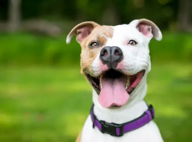

In [11]:
im = PILImage.create("dog.jpg")
im.thumbnail((192, 192))
im

In [12]:
learn = load_learner("pet_classifier.pkl")
learn

In [13]:
%time learn.predict(im) #%time to get time to execute

CPU times: user 323 ms, sys: 53.1 ms, total: 376 ms
Wall time: 58.4 ms


('staffordshire_bull_terrier',
 tensor(34),
 tensor([5.4618e-05, 3.6172e-05, 2.5814e-04, 5.8295e-05, 8.5820e-05, 4.2476e-05,
         1.3398e-04, 1.1477e-04, 1.4372e-04, 1.8071e-04, 8.2177e-05, 7.8438e-05,
         3.4221e-02, 4.1157e-01, 4.0578e-05, 2.3948e-04, 3.0276e-04, 3.6447e-04,
         3.9196e-05, 5.7313e-05, 2.4892e-05, 1.3842e-04, 1.5308e-04, 1.1656e-04,
         5.0639e-05, 2.5830e-05, 2.1353e-04, 7.7849e-05, 9.5607e-05, 2.2794e-05,
         2.9579e-05, 9.0235e-05, 5.1725e-05, 4.2469e-05, 5.5056e-01, 1.4755e-04,
         5.6481e-05]))

In [14]:
categories = learn.dls.vocab #give the categories from the dataloader


def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [15]:
classify_image(im)  # as gradio doesnt understand tensors as returned by the model we convert it to float values 

{'Abyssinian': 5.4618492868030444e-05,
 'Bengal': 3.6172230466036126e-05,
 'Birman': 0.00025813953834585845,
 'Bombay': 5.8295488997828215e-05,
 'British_Shorthair': 8.582024020142853e-05,
 'Egyptian_Mau': 4.247608012519777e-05,
 'Maine_Coon': 0.00013398432929534465,
 'Persian': 0.00011476616055006161,
 'Ragdoll': 0.0001437158352928236,
 'Russian_Blue': 0.00018070547957904637,
 'Siamese': 8.217736467486247e-05,
 'Sphynx': 7.843774073990062e-05,
 'american_bulldog': 0.034220851957798004,
 'american_pit_bull_terrier': 0.41156551241874695,
 'basset_hound': 4.057841215399094e-05,
 'beagle': 0.0002394813927821815,
 'boxer': 0.0003027580678462982,
 'chihuahua': 0.0003644705284386873,
 'english_cocker_spaniel': 3.919619484804571e-05,
 'english_setter': 5.731293640565127e-05,
 'german_shorthaired': 2.4891771317925304e-05,
 'great_pyrenees': 0.0001384172501275316,
 'havanese': 0.00015308322326745838,
 'japanese_chin': 0.00011656223068712279,
 'keeshond': 5.0639449909795076e-05,
 'leonberger': 2

## working with gradio now

In [16]:
image = gr.Image(height=192, width=192)
label = gr.Label()
examples = []

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False, share=True)  # share true to get a hosted link for 72hrs

* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://bfd0421cc908edd620.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [17]:
m = learn.model
m

Sequential(
  (0): TimmBody(
    (model): ConvNeXt(
      (stem): Sequential(
        (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((64,), eps=1e-06, elementwise_affine=True)
      )
      (stages): Sequential(
        (0): ConvNeXtStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): ConvNeXtBlock(
              (conv_dw): Conv2d(64, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=64)
              (norm): LayerNorm2d((64,), eps=1e-06, elementwise_affine=True)
              (mlp): GlobalResponseNormMlp(
                (fc1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
                (act): GELU()
                (drop1): Dropout(p=0.0, inplace=False)
                (grn): GlobalResponseNorm()
                (fc2): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
                (drop2): Dropout(p=0.0, inplace=False)
              )
              (shortcut): Identity()
              (drop_p